# Experiment to analyze the percentage of students which special educaitonal needs

This dataset doesn't have gender information but therefore it contains data until 2000

In [4]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()

def load_special_edu_support_percentage(ignore_special_schools=False):
    students_special_support = loader.load('students_with_special_educational_support_no_gender')

    students_special_support['year'] = pd.to_datetime(students_special_support['year'], format='%Y')
    students_special_support['total'] = pd.to_numeric(students_special_support['total'], errors='coerce')

    if ignore_special_schools:
        students_special_support = students_special_support[students_special_support['school']!="Special schools"] #filter out because their amount is so hight, we can't see the evolution of the other schools

    total_over_years = students_special_support.groupby(['year','school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    
    children_type =  children_type[children_type['Gender']=='Total']
    children_type = children_type.rename(columns={'Students': 'Value'})
    
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()


    merged_df = pd.merge(total_over_years, child_amount_per_year,on=['year','school'])
    merged_df['edu_support_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df


special_edu_support = load_special_edu_support_percentage()

total      Value  \
year       school                                                               
2000-01-01 Free Waldorf Schools                               14.0    64430.0   
           Grammar schools (8 years of schooling)              0.0        0.0   
           Grammar schools (9 years of schooling)            812.0  2256861.0   
           Integrated comprehensive schools                 3856.0   545500.0   
           Intermediate schools                              842.0  1263382.0   
...                                                            ...        ...   
2022-01-01 Orientation stages independent of school type    7815.0   116688.0   
           Primary schools                                 91861.0  2240502.0   
           Schools with various courses of education       33214.0   545321.0   
           Secondary general schools                       24725.0   333239.0   
           Special schools                                326705.0   315993.0   

                                                          edu_support_relative  
year       school                                                               
2000-01-01 Free Waldorf Schools                                       0.000217  
           Grammar schools (8 years of schooling)                          NaN  
           Grammar schools (9 years of schooling)                     0.000360  
           Integrated comprehensive schools                           0.007069  
           Intermediate schools                                       0.000666  
...                                                                        ...  
2022-01-01 Orientation stages independent of school type              0.066973  
           Primary schools                                            0.041000  
           Schools with various courses of education                  0.060907  
           Secondary general schools                                  0.074196  
           Special schools                                            1.033899  

[230 rows x 3 columns]

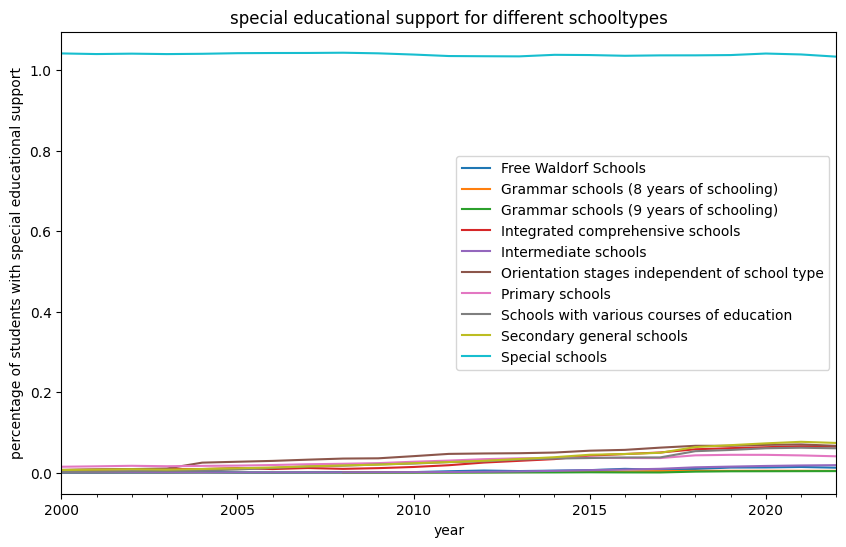

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for school in special_edu_support.index.get_level_values(1).unique():
    special_edu_support.xs(school, level='school')['edu_support_relative'].plot(ax=ax, label=school)

plt.title('special educational support for different schooltypes')
plt.xlabel('year')
plt.ylabel('percentage of students with special educational support')
plt.legend()
plt.show()

It's ovious that for special schools the proportion is over 100%. The used values are double checked, so it's likely that the two merged datasets are not complitely consistent. Furthermore all students in Special Schools seem to be categorized as students with special educaitonal support.

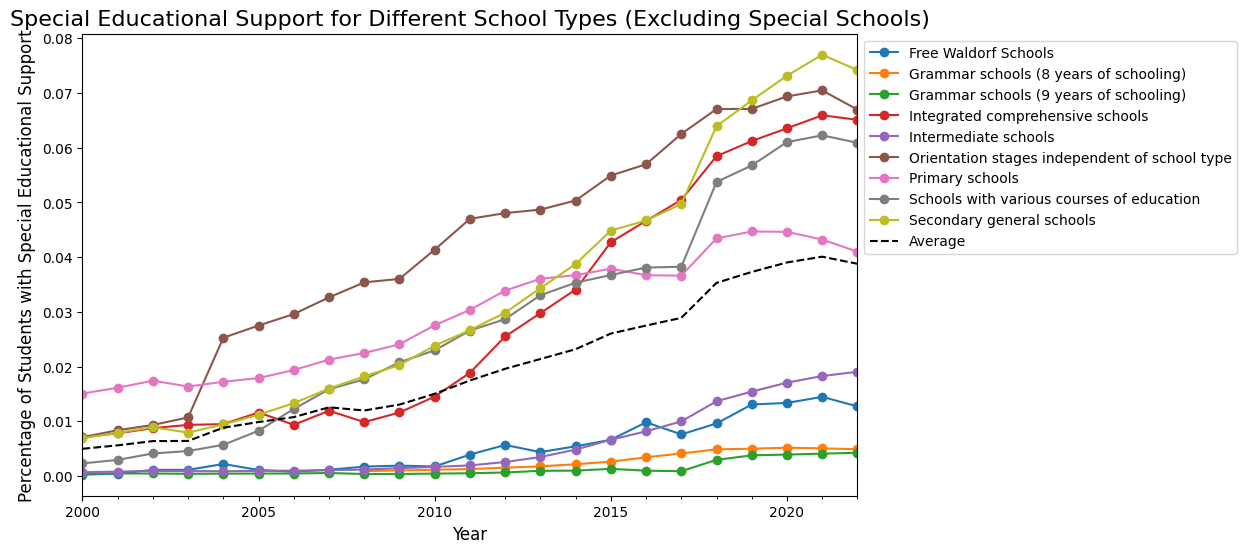

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

special_edu_support = load_special_edu_support_percentage(ignore_special_schools=True)
fig, ax = plt.subplots(figsize=(10, 6))

average_support_per_year = special_edu_support.groupby('year')['edu_support_relative'].mean()

for school in special_edu_support.index.get_level_values(1).unique():
    special_edu_support.xs(school, level='school')['edu_support_relative'].plot(ax=ax, label=school, marker='o')

average_support_per_year.plot(ax=ax, label='Average', color='black', linestyle='--')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Special Educational Support for Different School Types (Excluding Special Schools)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Students with Special Educational Support', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.show()
